In [1]:
import os
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt


In [ ]:
os.environ['KAGGLE_USERNAME'] = 'anirudhnsrivatsa' 
os.environ['KAGGLE_KEY'] = 'a6e4b78dfab7f40191b22329f85cd5b0'  

# Download and extract the dataset
# Download and extract the dataset
!kaggle competitions download -c dogs-vs-cats 
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip -d data
!unzip -q test1.zip -d data

# Load the training data filenames and labels
train_filenames = os.listdir('data/train')
train_labels = [int(filename.split('.')[0] == 'dog') for filename in train_filenames]
df_train = pd.DataFrame({'filename': train_filenames, 'label': train_labels})


In [34]:
import os
import pandas as pd

train_filenames = os.listdir('data/train')
train_labels = [int(filename.startswith('dog')) for filename in train_filenames]
df_t = pd.DataFrame({'filename': train_filenames, 'label': train_labels})

df_t.head()


,filename,label
0,cat.6275.jpg,0
1,dog.6390.jpg,1
2,dog.8812.jpg,1
3,dog.1505.jpg,1
4,dog.2248.jpg,1


In [5]:
df_t.shape


(25000, 2)

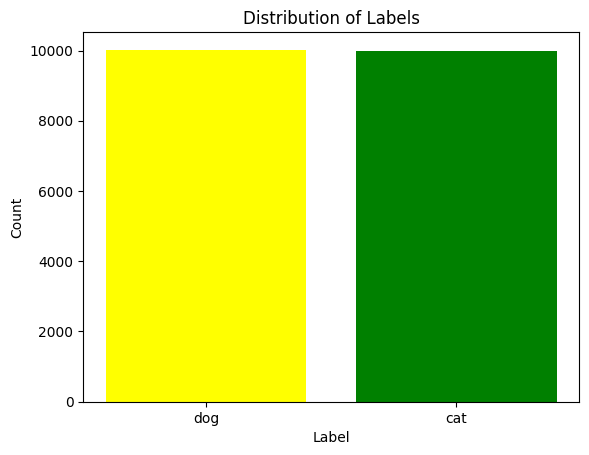

In [33]:
import matplotlib.pyplot as plt

counts = df_t['label'].value_counts()

plt.bar(['dog', 'cat'], counts, color=['yellow', 'green'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
# splitting to train & val
df_t, val_df = train_test_split(df_t, test_size=0.2, random_state=100)



df_t['label'] = df_t['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df_t, directory='data/train', 
                                                    x_col='filename', 
                                                    y_col='label', 
                                                    target_size=(224,224), 
                                                    class_mode='binary', 
                                                    batch_size=64, shuffle=False)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=val_df, directory='data/train', 
                                                x_col='filename', 
                                                y_col='label', 
                                                target_size=(224,224), 
                                                class_mode='binary', 
                                                batch_size=64, shuffle=False)



Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [39]:
from tensorflow import keras
from tensorflow.keras import layers

def create_model():
    # Define the CNN architecture
    cnn = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    
    return model

cnn = create_model()
cnn.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 26, 26, 128)     

In [10]:
history = base_cnn.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
313/313 [==============================] - 122s 346ms/step - loss: 0.6646 - acc: 0.5771 - val_loss: 0.5766 - val_acc: 0.6868
Epoch 2/10
313/313 [==============================] - 105s 336ms/step - loss: 0.5465 - acc: 0.7193 - val_loss: 0.5023 - val_acc: 0.7562
Epoch 3/10
313/313 [==============================] - 106s 337ms/step - loss: 0.4690 - acc: 0.7773 - val_loss: 0.4452 - val_acc: 0.7904
Epoch 4/10
313/313 [==============================] - 107s 343ms/step - loss: 0.4004 - acc: 0.8169 - val_loss: 0.3988 - val_acc: 0.8212
Epoch 5/10
313/313 [==============================] - 107s 341ms/step - loss: 0.3360 - acc: 0.8558 - val_loss: 0.3724 - val_acc: 0.8390
Epoch 6/10
313/313 [==============================] - 107s 340ms/step - loss: 0.2755 - acc: 0.8834 - val_loss: 0.3557 - val_acc: 0.8500
Epoch 7/10
313/313 [==============================] - 106s 338ms/step - loss: 0.2152 - acc: 0.9107 - val_loss: 0.3524 - val_acc: 0.8528
Epoch 8/10
313/313 [============================

In [11]:
val_loss, val_accuracy = base_cnn.evaluate(val_generator)
print("Validation accuracy:", val_accuracy)


79/79 [==============================] - 20s 250ms/step - loss: 0.5012 - acc: 0.8636
Validation accuracy: 0.8636000156402588


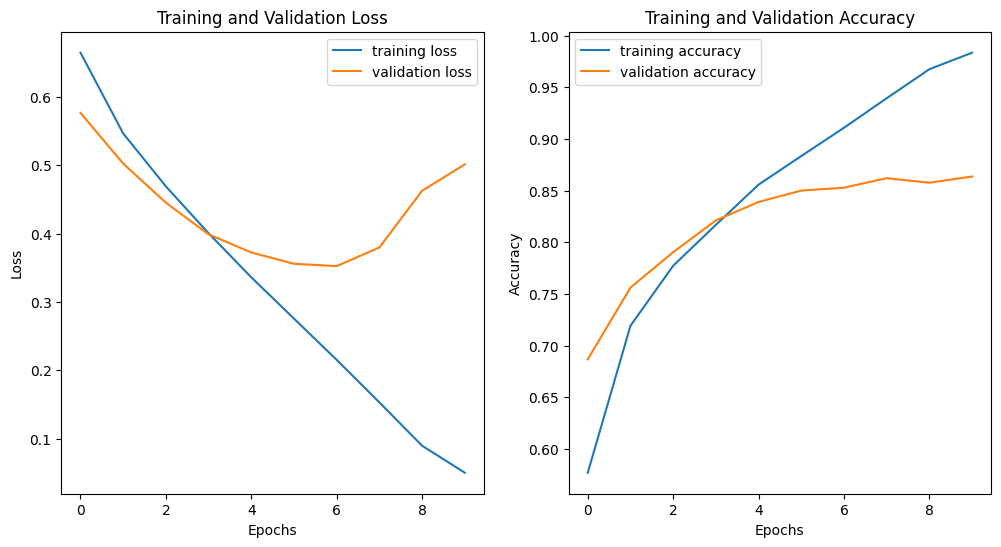

In [12]:
import matplotlib.pyplot as plt

# training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# training and validation accuracy
plt.subplot(1, 2, 2) 
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()



2/2 [==============================] - 0s 20ms/step


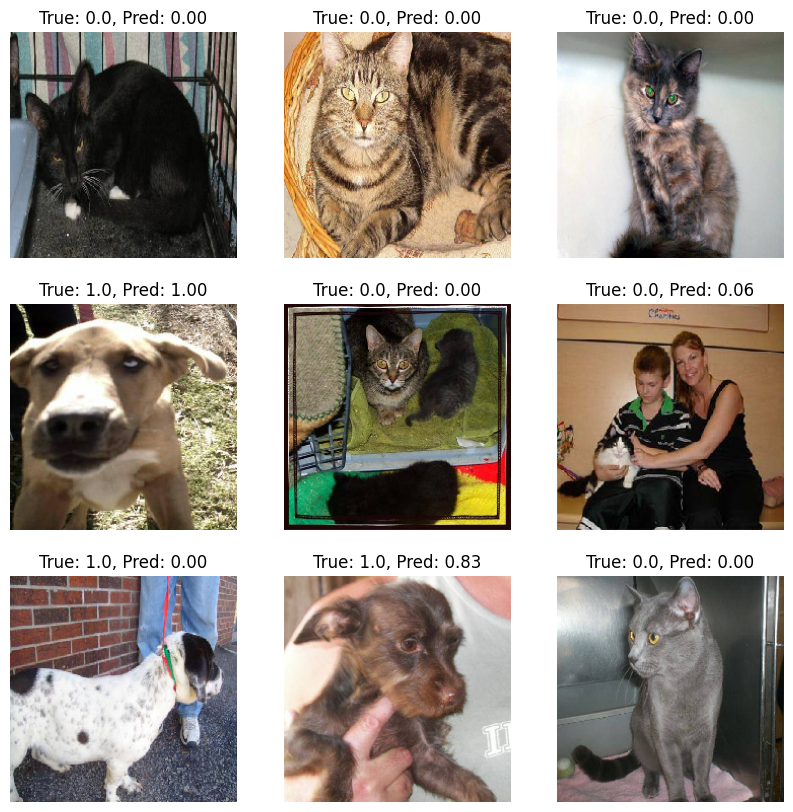

In [13]:
x_val, y_val = next(val_generator)
preds = base_cnn.predict(x_val)

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_val[i])
    ax.set_title(f"True: {y_val[i]}, Pred: {preds[i][0]:.2f}")
    ax.axis('off')

In [40]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), input_shape=(224, 224, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
layers.MaxPooling2D((2, 2)),
layers.BatchNormalization(),
layers.Dropout(0.5),
layers.Flatten(),
layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
layers.BatchNormalization(),
layers.Dropout(0.5),
layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])


model = create_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 26, 26, 128)     

In [17]:
# Train the model on the training data
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
313/313 [==============================] - 119s 369ms/step - loss: 1.6236 - acc: 0.6529 - val_loss: 1.2575 - val_acc: 0.6746
Epoch 2/10
313/313 [==============================] - 115s 366ms/step - loss: 1.0758 - acc: 0.7636 - val_loss: 0.9834 - val_acc: 0.7936
Epoch 3/10
313/313 [==============================] - 114s 363ms/step - loss: 0.9161 - acc: 0.8074 - val_loss: 0.9274 - val_acc: 0.7958
Epoch 4/10
313/313 [==============================] - 115s 368ms/step - loss: 0.8909 - acc: 0.8322 - val_loss: 0.8794 - val_acc: 0.8384
Epoch 5/10
313/313 [==============================] - 116s 370ms/step - loss: 0.8636 - acc: 0.8539 - val_loss: 0.8891 - val_acc: 0.8452
Epoch 6/10
313/313 [==============================] - 114s 365ms/step - loss: 0.8767 - acc: 0.8709 - val_loss: 0.9447 - val_acc: 0.8560
Epoch 7/10
313/313 [==============================] - 114s 363ms/step - loss: 0.9003 - acc: 0.8876 - val_loss: 1.0039 - val_acc: 0.8676
Epoch 8/10
313/313 [============================

In [18]:
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_generator)
print("Validation accuracy:", val_acc)

79/79 [==============================] - 20s 250ms/step - loss: 1.1208 - acc: 0.8674
Validation accuracy: 0.8673999905586243


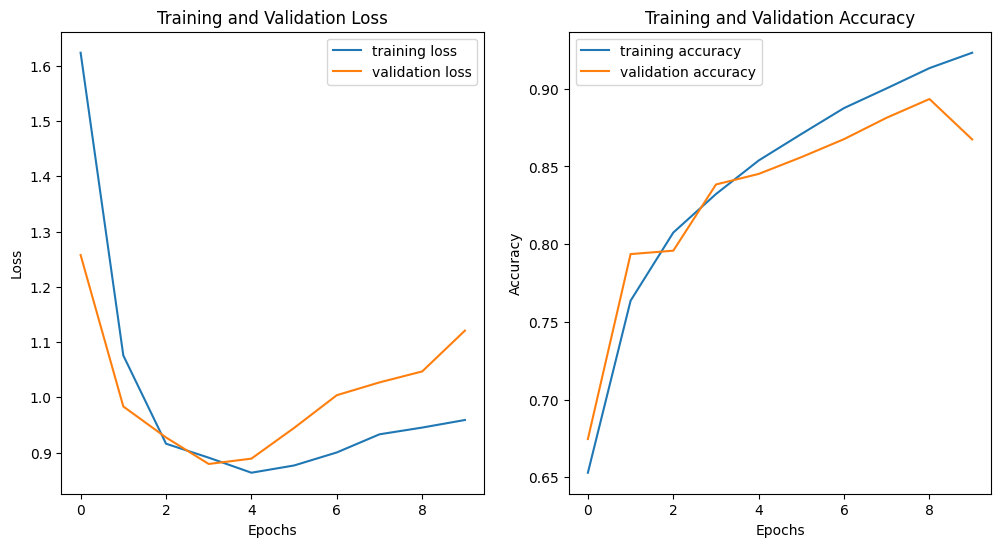

In [20]:
# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


2/2 [==============================] - 0s 20ms/step


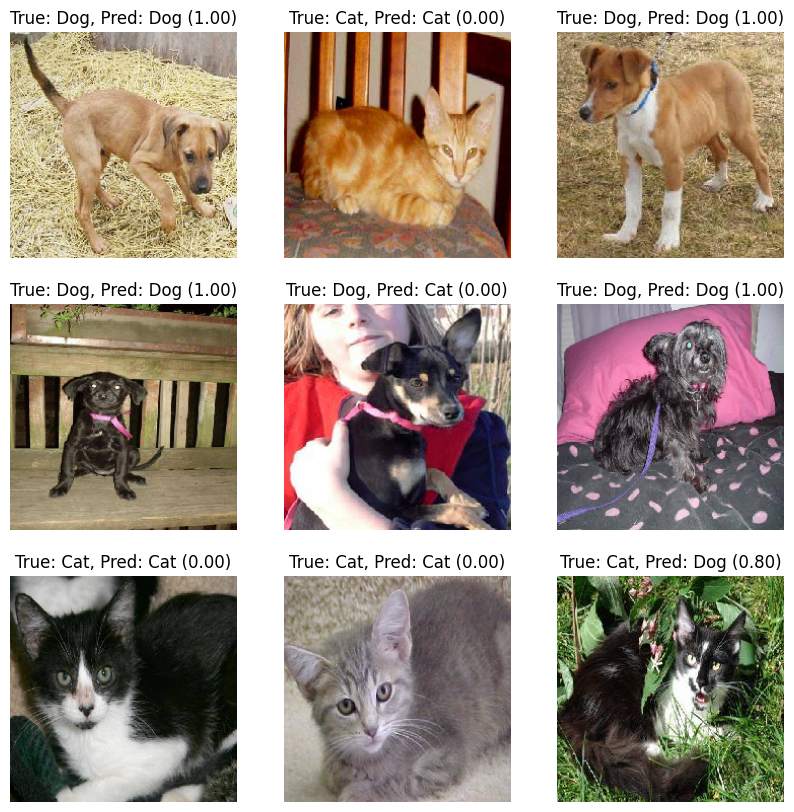

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a batch of validation data
x_val, y_val = val_generator.next()

# Make predictions on the validation data
preds = base_cnn.predict(x_val)

# Display a 3x3 grid of images with their true labels and predicted probabilities
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    # Display the image
    ax.imshow(x_val[i])
    ax.axis('off')
    # Set the title with the true label and predicted probability
    true_label = 'Dog' if y_val[i] == 1 else 'Cat'
    pred_prob = preds[i][0]
    pred_label = 'Dog' if pred_prob >= 0.5 else 'Cat'
    ax.set_title(f"True: {true_label}, Pred: {pred_label} ({pred_prob:.2f})")


In [29]:
IMAGE_SIZE = (224, 224)
batch_size = 32

# Get the list of filenames in the test directory
test_filenames = os.listdir("data/test1")

# Create a DataFrame with the filenames
test_df = pd.DataFrame({'filename': test_filenames})

# Get the number of samples in the test set
nb_samples = test_df.shape[0]

# Create a test data generator with image rescaling
test_datagen = ImageDataGenerator(rescale=1/255)

# Use the test data generator to create a test data iterator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="data/test1/",
    x_col="filename",
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)


Found 12500 validated image filenames.


In [31]:
import numpy as np

# Predict on the test set
predictions = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

# Threshold for class prediction
threshold = 0.5

# Assign labels to test images based on the prediction output
test_df['label'] = np.where(predictions > threshold, 1, 0)


391/391 [==============================] - 45s 115ms/step


In [32]:
# Create output dataframe with image ids and predicted labels
output_df = pd.DataFrame({'id': test_df['filename'].str.split('.').str[0], 'label': test_df['label']})

# Save output dataframe to CSV file
output_df.to_csv('predictions.csv', index=False, columns=['id', 'label'])
